# Digital image and signal processing

## Exercise 2

The aim of the exercise is to test the `numpy.fft` function `numpy.fft` to find the simple and inverse Fourier transform [1, 3].

### Authors

- Kinga Marek
- Mariusz Wiśniewski

### Task 1  

Generate a sample sequence corresponding to a 50 Hz sine wave with a length of 65,536.

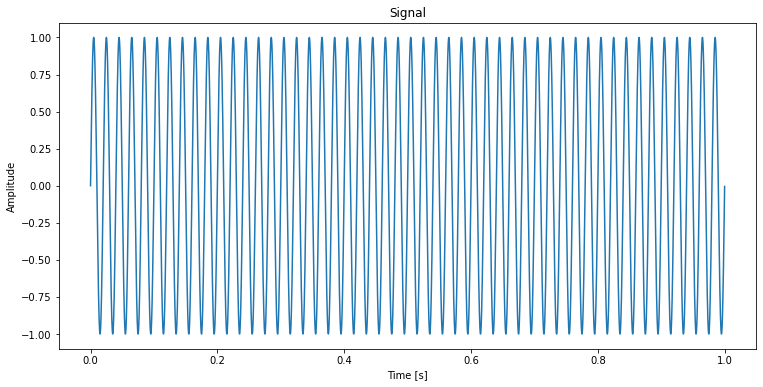

In [1]:
import matplotlib.pyplot as plt
import numpy as np

frequency = 50  # signal frequency
sample_length = 65536
fs = 65536  # sampling frequency
signal_duration = sample_length/fs
time_step = 1/fs

x_axis = np.arange(0, signal_duration, time_step)
y_axis = np.sin(2 * np.pi * frequency * x_axis)

plt.rcParams['figure.figsize'] = [12.5, 6]
plt.plot(x_axis, y_axis)
plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

### Task 2

Find the discrete Fourier transform of this signal and plot its amplitude spectrum in the frequency range [0, *fs* / 2], where *fs* is the sampling frequency.

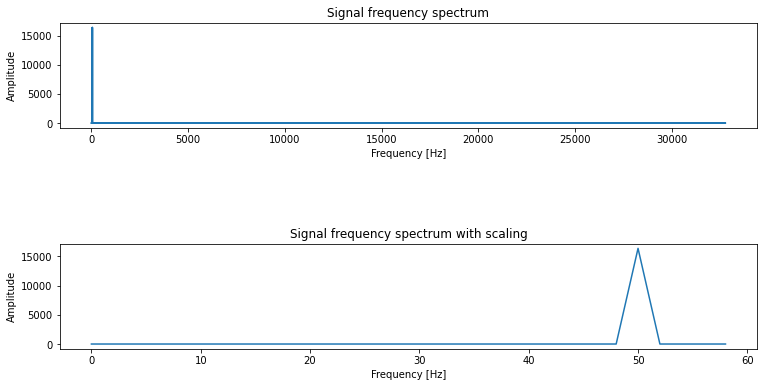

In [2]:
fft_freq = np.abs(np.fft.fftfreq(int(fs/2), time_step))
fft_amplitude = np.abs(np.fft.fft(y_axis[:fft_freq.size]))

plt.subplots_adjust(hspace=1.1)
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(211)
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(fft_freq[:30], fft_amplitude[:30])
plt.title('Signal frequency spectrum with scaling')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()

### Task 3

Generate a sample string of a mixture of two sine waves (i.e. their linear combination) of 50 and 60 Hz. Complete the steps from [task 2](#task-2) for this signal.

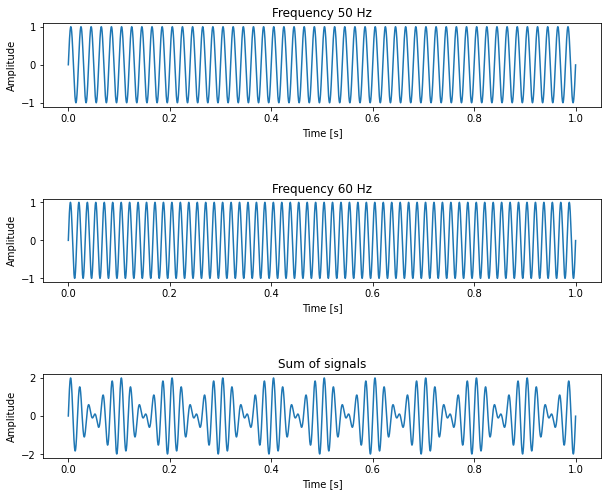

In [3]:
frequency_1 = 50
frequency_2 = 60

time_samples = np.arange(0, signal_duration, time_step)
sample_1 = np.sin(2 * np.pi * frequency_1 * time_samples)
sample_2 = np.sin(2 * np.pi * frequency_2 * time_samples)
samples_sum = sample_1 + sample_2

plt.subplots_adjust(hspace=1.1)
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(311)
plt.plot(time_samples, sample_1)
plt.title(f'Frequency {frequency_1} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.plot(time_samples, sample_2)
plt.title(f'Frequency {frequency_2} Hz')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(313)
plt.plot(time_samples, samples_sum)
plt.title('Sum of signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.show()

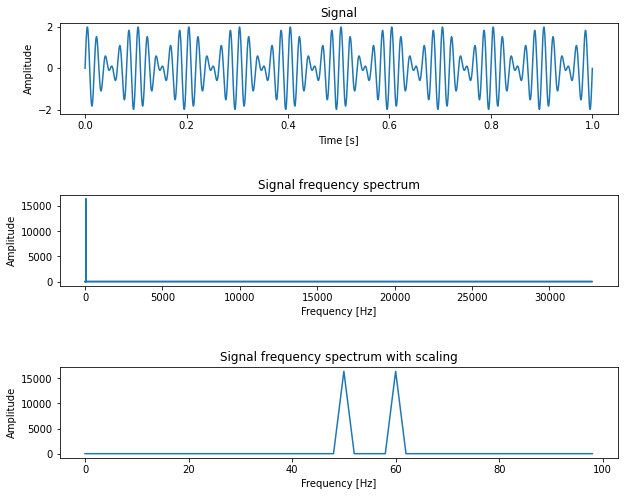

In [4]:
fft_freq = np.abs(np.fft.fftfreq(int(fs/2), time_step))
fft_amplitude = np.abs(np.fft.fft(samples_sum[:fft_freq.size]))

plt.subplots_adjust(hspace=0.9)
plt.rcParams['figure.figsize'] = [10, 8]

plt.subplot(311)
plt.plot(time_samples, samples_sum)
plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(312)
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(313)
plt.plot(fft_freq[:50], fft_amplitude[:50])
plt.title('Signal frequency spectrum with scaling')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()

### Task 4

Repeat the experiments for different signal durations, i.e. for different sampling rates.

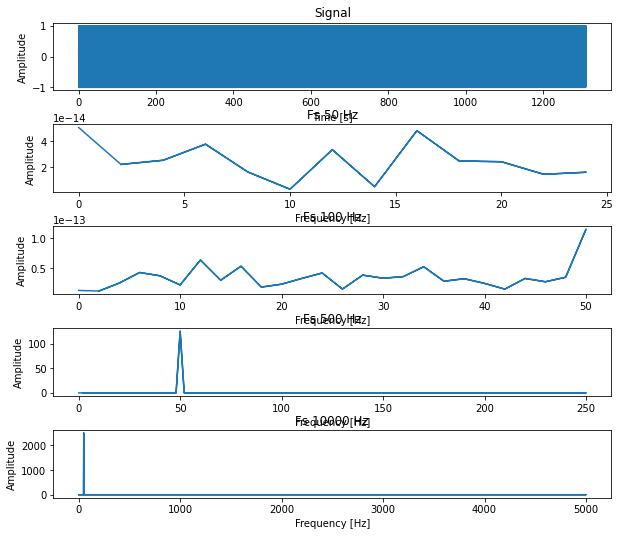

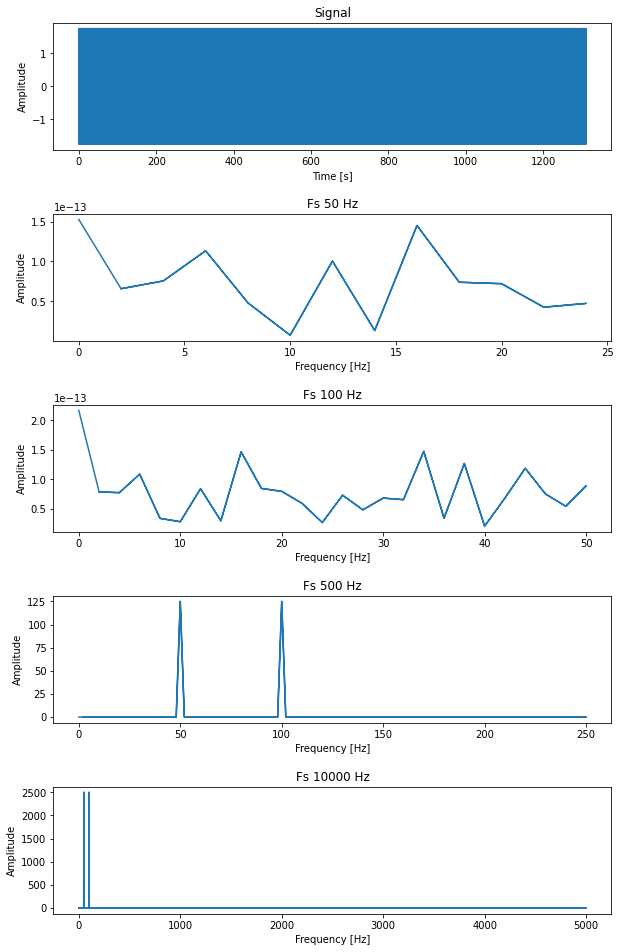

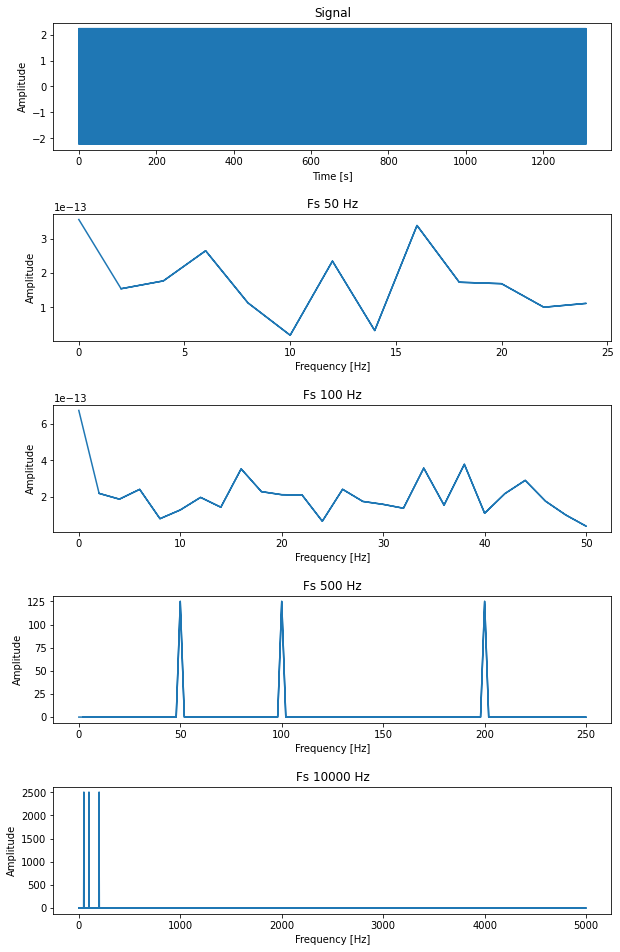

In [5]:
def get_signal_duration(f_s):
    return sample_length/f_s


def get_time_step(f_s):
    return 1/f_s


def create_x_axis(f_s):
    return np.arange(0, get_signal_duration(f_s), get_time_step(f_s))


def create_y_axis(freq, x):
    y = np.zeros(x.size)
    for f in freq:
        y += np.sin(2 * np.pi * f * x)
    return y


fs = [50, 100, 500, 10000]
signals_frequencies = [[50], [50, 100], [50, 100, 200]]

for signals_freq in signals_frequencies:
    plt.subplots_adjust(hspace=0.5, top=0.95)
    plt.rcParams['figure.figsize'] = [10, 15]

    time = create_x_axis(fs[0])

    plt.subplot(511)
    plt.plot(time, create_y_axis(signals_freq, time/fs[0]))

    plt.title('Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    fft_freq = np.abs(np.fft.fftfreq(int(fs[0] / 2), get_time_step(fs[0])))
    fft_amplitude = np.abs(np.fft.fft(
        create_y_axis(signals_freq, time)[: fft_freq.size]))

    plt.subplot(512)
    plt.plot(fft_freq, fft_amplitude)
    plt.title(f'Fs {fs[0]} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

    fft_freq = np.abs(np.fft.fftfreq(int(fs[1] / 2), get_time_step(fs[1])))
    time = create_x_axis(fs[1])
    fft_amplitude = np.abs(np.fft.fft(
        create_y_axis(signals_freq, time)[: fft_freq.size]))

    plt.subplot(513)
    plt.plot(fft_freq, fft_amplitude)
    plt.title(f'Fs {fs[1]} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

    fft_freq = np.abs(np.fft.fftfreq(int(fs[2] / 2), get_time_step(fs[2])))
    time = create_x_axis(fs[2])
    fft_amplitude = np.abs(np.fft.fft(
        create_y_axis(signals_freq, time)[: fft_freq.size]))

    plt.subplot(514)
    plt.plot(fft_freq, fft_amplitude)
    plt.title(f'Fs {fs[2]} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

    fft_freq = np.abs(np.fft.fftfreq(int(fs[3] / 2), get_time_step(fs[3])))
    time = create_x_axis(fs[3])
    fft_amplitude = np.abs(np.fft.fft(
        create_y_axis(signals_freq, time)[: fft_freq.size]))

    plt.subplot(515)
    plt.plot(fft_freq, fft_amplitude)
    plt.title(f'Fs {fs[3]} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

    plt.show()

### Task 5

Find the inverse Fourier transform of the sequences determined in [task 2](#task-2) and compare with the original sequences.

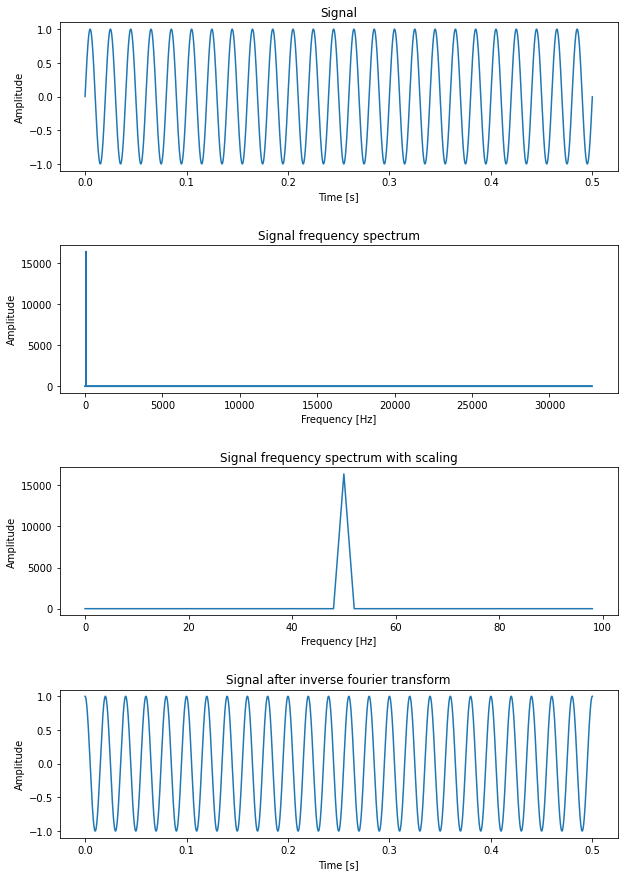

In [6]:
fs = 65536

# for signal in ex 1. - 50Hz

fft_freq = np.abs(np.fft.fftfreq(fs // 2, time_step))
fft_amplitude = np.abs(np.fft.fft(y_axis, fft_freq.size))

plt.subplots_adjust(hspace=0.5)
plt.rcParams['figure.figsize'] = [8, 15]

plt.subplot(411)
plt.plot(x_axis[:fft_freq.size], y_axis[:fft_freq.size])
plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(412)
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(413)
plt.plot(fft_freq[:50], fft_amplitude[:50])
plt.title('Signal frequency spectrum with scaling')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

inv_samples_sum = np.fft.ifft(fft_amplitude, fft_freq.size).real

plt.subplot(414)
plt.plot(x_axis[:fft_freq.size], inv_samples_sum)
plt.title('Signal after inverse fourier transform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

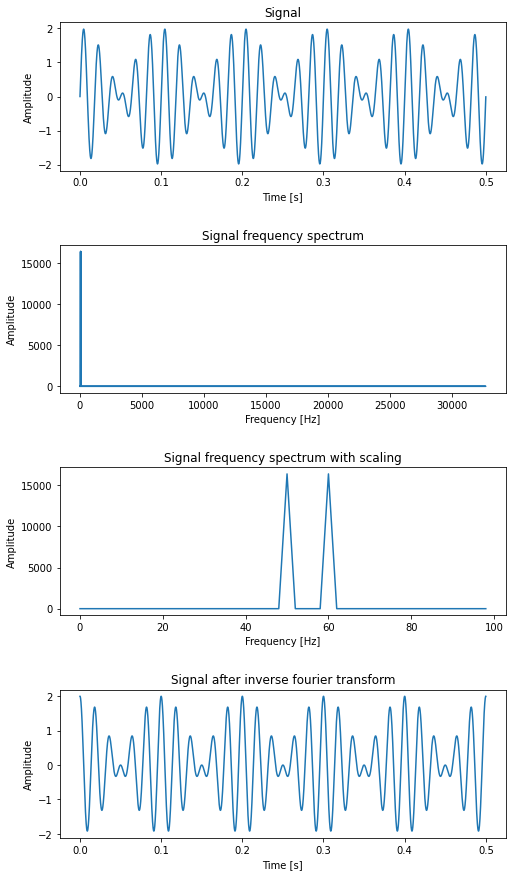

In [7]:
# for signal in ex 2. - 50Hz + 60Hz

fft_amplitude = np.abs(np.fft.fft(samples_sum[:fft_freq.size]))

plt.subplots_adjust(hspace=0.5)
plt.rcParams['figure.figsize'] = [8, 15]

plt.subplot(411)
plt.plot(time_samples[:fft_freq.size], samples_sum[:fft_freq.size])
plt.title('Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(412)
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(413)
plt.plot(fft_freq[:50], fft_amplitude[:50])
plt.title('Signal frequency spectrum with scaling')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

inv_samples_sum = np.fft.ifft(fft_amplitude).real

plt.subplot(414)
plt.plot(time_samples[:inv_samples_sum.size], inv_samples_sum)
plt.title('Signal after inverse fourier transform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()